In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import random
from tensorflow import function as tf_function
from sklearn.model_selection import train_test_split

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/drive/MyDrive/TORCS/normalized_data_5.csv')

In [ ]:
input_cols = [
    'trackpos', 'angle', 'speedX', 'speedY', 'speedZ'
] + [f'track{i}' for i in range(1, 20)]

one_hot = pd.get_dummies(df["action"], prefix = "action_")

adam_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)


input_df = df[input_cols]
input_df = pd.concat([input_df, one_hot], axis=1)

target_df = df['reward4']  # Target variable
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_df.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(63, activation='relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Output layer for regression
])
model2.compile(optimizer=adam_optimizer,  loss='huber')
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         6,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 63)             │         8,127 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,608 (64.88 KB)

 Trainable params: 16,608 (64.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model2.fit(input_df, target_df, epochs=80, batch_size=1000, validation_split=0.2)

Epoch 1/80
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1782 - val_loss: 0.0783
Epoch 2/80
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0798 - val_loss: 0.0727
Epoch 3/80
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0743 - val_loss: 0.0693
Epoch 4/80
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0706 - val_loss: 0.0664
Epoch 5/80
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0699 - val_loss: 0.0640
Epoch 6/80
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0676 - val_loss: 0.0619
Epoch 7/80
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0642 - val_loss: 0.0603
Epoch 8/80
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0609 - val_loss: 0.0587
Epoch 9/80
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0573 - val_loss: 0.0572
Epoch 10/80
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0577 - val_loss: 0.0559
Epoch 11/80
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0567 - val_loss: 0.0546
Epoch 12/80
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0554 - val_l

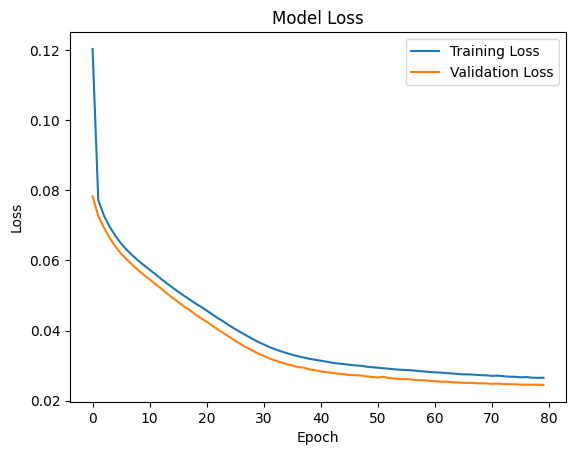

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [ ]:
model2.save('/content/drive/MyDrive/TORCS/100explore_v2_r4.keras')